# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

bb_df = pd.read_csv('billboard.csv')

In [61]:
# What's the mix of songs by genre?
print bb_df[['genre', 'year']].groupby('genre').count()
print

             year
genre            
Country        74
Electronica     4
Gospel          1
Jazz            1
Latin           9
Pop             9
R&B            23
Rap            58
Reggae          1
Rock          137



In [62]:
"""
I wrote a bunch of experimental code to look at the general aspects of the data. Medians, means, and
then more of the same when grouped by genre. First calculations were to look at the data overall.

The code for this is in Data_Explore.py in this directory and can be run from the command line.
"""

# I wonder what is the mean position on the chart of each song in each week
# since it entered
# 
# In fact, no songs stay on the charts for more than 65 weeks.
# And in fact, might as well drop columns 66-76 entirely going forward.
# Suspicion: they give those extra columns to allow for extreme outliers, and none were encountered
# In 2000.

mean_by_week = bb_df.loc[:,'x1st.week':'x65th.week'].mean()
mean_by_week

x1st.week     79.958991
x2nd.week     71.173077
x3rd.week     65.045603
x4th.week     59.763333
x5th.week     56.339041
x6th.week     52.360714
x7th.week     49.219331
x8th.week     47.119231
x9th.week     46.343874
x10th.week    45.786885
x11th.week    45.474576
x12th.week    44.198198
x13th.week    44.352381
x14th.week    45.892157
x15th.week    47.898477
x16th.week    48.241758
x17th.week    51.265537
x18th.week    52.108434
x19th.week    53.166667
x20th.week    54.267123
x21st.week    26.184615
x22nd.week    25.636364
x23rd.week    23.812500
x24th.week    26.782609
x25th.week    26.131579
x26th.week    28.000000
x27th.week    27.344828
x28th.week    25.000000
x29th.week    23.650000
x30th.week    26.400000
                ...    
x36th.week    18.555556
x37th.week    20.888889
x38th.week    19.375000
x39th.week    20.250000
x40th.week    17.857143
x41st.week    18.571429
x42nd.week    14.166667
x43rd.week    17.666667
x44th.week    21.666667
x45th.week    17.800000
x46th.week    20

In [63]:
# Highest and lowest means.

print "Week of lowest mean ranking: " + mean_by_week.idxmax()

# Minimum would give us the opposite. In what week does the biggest song peak
# out? Turns out it's 42 weeks in.
print "Week of highest mean ranking: " + mean_by_week.idxmin()

Week of lowest mean ranking: x1st.week
Week of highest mean ranking: x42nd.week


In [64]:
# I wonder how that changes if we look at the median rather than the mean?
# Same general idea:

median_by_week = bb_df.loc[:,'x1st.week':'x65th.week'].median()
median_by_week

x1st.week     81.0
x2nd.week     73.0
x3rd.week     66.0
x4th.week     61.0
x5th.week     57.0
x6th.week     51.5
x7th.week     47.0
x8th.week     45.5
x9th.week     42.0
x10th.week    40.0
x11th.week    42.5
x12th.week    42.0
x13th.week    42.5
x14th.week    44.0
x15th.week    46.0
x16th.week    47.0
x17th.week    52.0
x18th.week    56.5
x19th.week    55.5
x20th.week    58.5
x21st.week    24.0
x22nd.week    21.0
x23rd.week    20.5
x24th.week    21.5
x25th.week    22.5
x26th.week    26.0
x27th.week    26.0
x28th.week    23.5
x29th.week    22.5
x30th.week    31.5
              ... 
x36th.week    16.0
x37th.week    16.0
x38th.week    16.0
x39th.week    13.0
x40th.week    14.0
x41st.week    14.0
x42nd.week    15.0
x43rd.week    18.0
x44th.week    21.0
x45th.week    17.0
x46th.week    21.0
x47th.week    22.0
x48th.week    16.5
x49th.week    18.5
x50th.week    22.5
x51st.week    28.0
x52nd.week    29.0
x53rd.week    33.5
x54th.week    19.5
x55th.week    21.5
x56th.week    25.5
x57th.week  

In [65]:
print "Week of lowest median ranking:" + median_by_week.idxmax()
print "Week of highest median ranking: " + median_by_week.idxmin()

Week of lowest median ranking:x1st.week
Week of highest median ranking: x39th.week


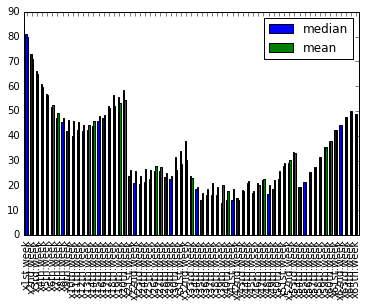

In [66]:
# Quick 'n dirty chart of these things
df_temp = pd.concat([median_by_week, mean_by_week], axis=1)
df_temp.columns = ['median','mean']
%matplotlib inline
df_temp.plot(kind = 'bar')

genre
Country         x1st.week
Electronica    x20th.week
Gospel         x20th.week
Jazz            x1st.week
Latin           x1st.week
Pop             x1st.week
R&B            x20th.week
Rap             x1st.week
Reggae         x15th.week
Rock            x1st.week
dtype: object
genre
Country        x40th.week
Electronica    x13th.week
Gospel          x9th.week
Jazz            x3rd.week
Latin          x21st.week
Pop            x19th.week
R&B             x6th.week
Rap            x23rd.week
Reggae          x7th.week
Rock           x42nd.week
dtype: object


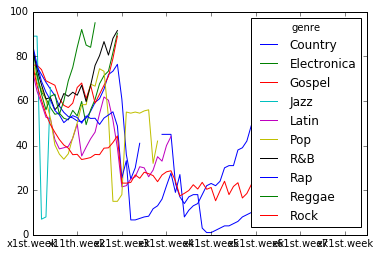

In [67]:
"""
I also explored similarly by genre. The code for this section is in Data_Explore_genre.py
"""

# How about doing the same by genre?
mean_by_week = bb_df.groupby('genre').mean()
mean_by_week.drop('year', inplace=True, axis=1)
x = mean_by_week.transpose()
print x.idxmax()
print x.idxmin()
x.plot()

genre
Country        x20th.week
Electronica    x20th.week
Gospel         x20th.week
Jazz            x1st.week
Latin          x17th.week
Pop            x17th.week
R&B            x17th.week
Rap             x1st.week
Reggae         x15th.week
Rock            x1st.week
dtype: object
genre
Country        x40th.week
Electronica    x13th.week
Gospel          x9th.week
Jazz            x3rd.week
Latin          x21st.week
Pop            x19th.week
R&B            x13th.week
Rap            x24th.week
Reggae          x7th.week
Rock           x39th.week
dtype: object


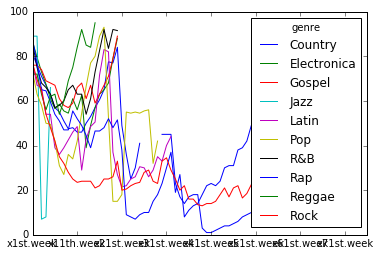

In [68]:
# And median, also by genre
median_by_week = bb_df.groupby('genre').median()
median_by_week.drop('year', inplace=True, axis=1)
y = median_by_week.transpose()
print y.idxmax()
print y.idxmin()
y.plot()

##### Write a brief description of your data, and any interesting observations you've made thus far. 

Data is for all songs that appeared in the Billboard 100 in calendar year 2000.

It includes songs that entered in 1999 as well as those that entered in 2000 and remained into 2001. This somewhat complicates analysis, as the time period captured for each song is different.

Data captured includes the artist (which requires some cleanup due to non-ASCII characters), the song name (which also requires some cleanup), genre, date the song entered the chart (which might be in 1999 or 2000) and the date the song peaked on the chart (which might be in 1999, 2000 or 2001). The date that the song left the chart is not explicitly stated but can be determined from other available data.

The data by week is captured as the position the song occupied on the chart in each week it appeared. There is a column for each week of appearance, labeled 1st-76th. In practice, the last 11 columns are unnecessary because the longest period any song appeared on the chart was 65 weeks. I suspect the extra weeks are included in this dataset to allow for extreme outliers in some time periods, but for the purpose of this analysis I decided to cut it off at 65.

The average and median song will enter the chart on week 1 at it's lowest ranking, climb for some time, peak, then decline. It will on average and median, leave the chart from a higher position than the one it occupied when it entered, suggesting that the "build" in popularity is slower than the post-peak decline.

On average, a song will peak 42 weeks after it entered. The median song peaks 39 weeks after it enters. Given a 65 week range, that's not a substantial difference and is not likely to be significant. I elected not to pursue this.

When examined by genre, there were much greater differences as shown in the final two charts and their associated series. Rock, Rap and Country were the longest-lived music genres.

The bulk of the songs are Rock and Country, with Rap also incuding sufficient numbers for meaningful analysis. The other genres are relative outliers and there will be a very low confidence associated with any conclusions drawn from them.

Country        74
Electronica     4
Gospel          1
Jazz            1
Latin           9
Pop             9
R&B            23
Rap            58
Reggae          1
Rock          137

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [69]:
"""
Data cleanup is in this section. Data was generally fairly clean, but there were some oddball non-ASCII
characters along with some numeric names in the text fields (artist and song). I decided to make all the
entries strings, then to remove non-ASCII characters.

All the other data seemed clean and I saw no reason to supplement it or change it at this time.

One thing to note is that tracking the song by week number on the chart rather than by calendar week makes it
near impossible to do any sort of visualization of how songs move up and down against each other throughout the
year which seems like it would be pretty interesting. That will be dealt with further on down.
"""

# Assign new column titles that are simple and easy to use
new_columns = ['year', 'artist', 'song', 'play_time', 'genre', 'entered_date', 'peak_date'] + range(1,77)
bb_df.columns = new_columns

# Earlier examination of data showed that there was no data past week 65
# Drop everything past 65, as it's all blank and doesn't add anything
bb_df.drop(range(66,77), inplace=True, axis=1)
bb_df.head()

,year,artist,song,play_time,genre,entered_date,peak_date,1,2,3,...,56,57,58,59,60,61,62,63,64,65
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Clean up the textual columns
# First make sure it's a string not some other type
bb_df['artist'].apply(str)
# Drop non ascii characters -- there were a few visible and it's a good practice in any case
# Replace with nothing
bb_df['artist'] = bb_df['artist'].apply(lambda x: ''.join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))
bb_df['artist']

0          Destiny's Child
1                  Santana
2            Savage Garden
3                  Madonna
4      Aguilera, Christina
5                    Janet
6          Destiny's Child
7        Iglesias, Enrique
8                    Sisqo
9                 Lonestar
10                  N'Sync
11     Aguilera, Christina
12        Vertical Horizon
13                   Creed
14                 Aaliyah
15         matchbox twenty
16           Carey, Mariah
17             Hill, Faith
18                     Mya
19                   Dream
20           Braxton, Toni
21           Anthony, Marc
22                      98
23         Destiny's Child
24            3 Doors Down
25                   Sisqo
26     Aguilera, Christina
27        Houston, Whitney
28                     Joe
29         Jordan, Montell
              ...         
287                2Ge+her
288         Madison Avenue
289                    Eve
290            Limp Bizkit
291        Spencer, Tracie
292              Nu Flavor
2

In [71]:
# Repeat with the song column
bb_df['song'].apply(str)
bb_df['song'] = bb_df['song'].apply(lambda x: ''.join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))
bb_df['song']

0                               Independent Women Part I
1                                           Maria, Maria
2                                     I Knew I Loved You
3                                                  Music
4                  Come On Over Baby (All I Want Is You)
5                                  Doesn't Really Matter
6                                            Say My Name
7                                            Be With You
8                                             Incomplete
9                                                 Amazed
10                                      It's Gonna Be Me
11                                     What A Girl Wants
12                                   Everything You Want
13                                   With Arms Wide Open
14                                             Try Again
15                                                  Bent
16                                 Thank God I Found You
17                             

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [72]:
"""
Going to melt the data then use that for visualizations. Everything from here down is also in the file Data_Melt_Viz.py
"""

bb_df = pd.melt(bb_df, id_vars=['year', 'artist', 'song', 'play_time', 'genre', 'entered_date', 'peak_date'], value_vars=range(1,66), var_name="week", value_name="rank")
bb_df = bb_df.sort_values(by=['entered_date', 'peak_date', 'artist', 'song', 'week'], ascending=[True, True, True, True, True])

bb_df['entered_date'] = bb_df['entered_date'].apply(pd.to_datetime)
bb_df['peak_date'] = bb_df['peak_date'].apply(pd.to_datetime)


# I want a column that shows me the date for each ranking. This is relatively
# simple, as the BB results are tabulated weekly. To find the date for the ranking
# take the date entered and add one week for each week beyond 1.
# OR put otherwise, add week -1 weeks to the entered date.

def add_date(date, week):
    """
    Function to add a provided number of weeks to a given date
    """
    newdate = date + timedelta(weeks = week)
    return newdate

bb_df['rank_date'] = 0

bb_df['rank_date'] = bb_df.apply(lambda row: add_date(row['entered_date'], row['week'] - 1), axis=1)

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

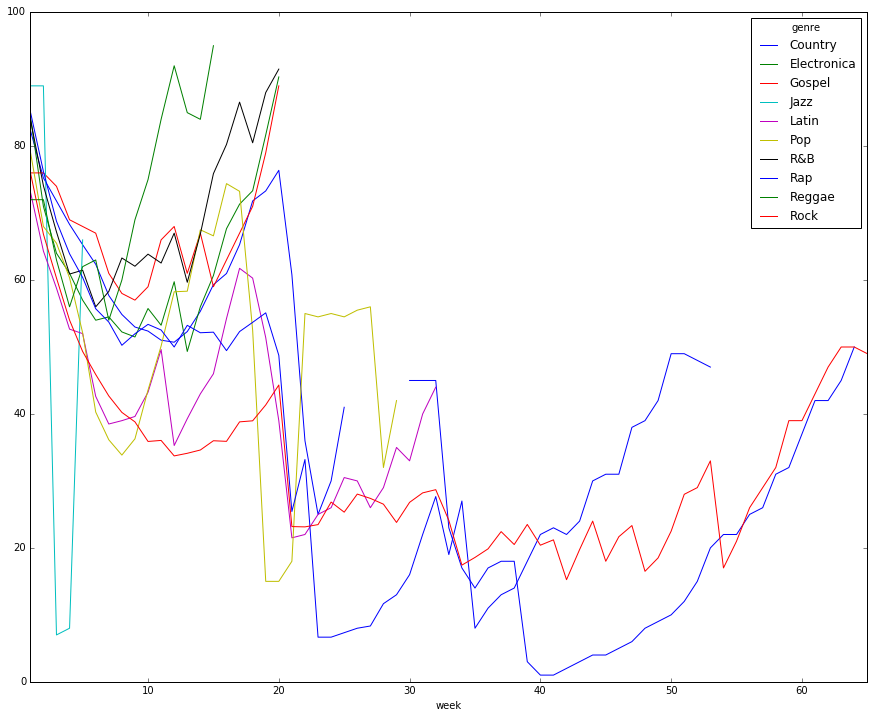

In [73]:
# Now I'm going to pivot so I can chart things by week on the BB 100
# Averaging by genre. This will give a similar result to the one during
# initial exploration. I could not figure out how to invert the y axis, so things would "peak"
# at the top rather than the bottom.

charting_df = pd.pivot_table(bb_df, values=('rank'), columns=('genre'), index=('week'), aggfunc='mean')

plot = charting_df.plot()

fig = plot.get_figure()
fig.set_size_inches(15,12)
plot

Kind of interesting. Rock and country songs tend to last longest on the charts, closely followed by rap. Others trail behind and there are some interesting artifacts to some of them. For example, pop seems to have an odd "double peak" when looked at in aggregate.

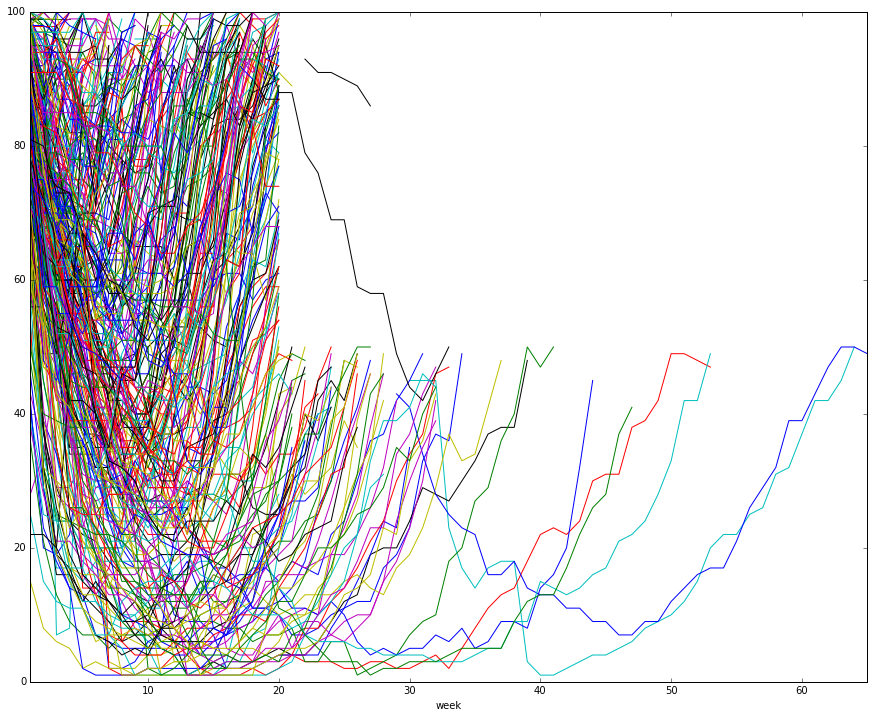

In [74]:
# How about looking at individual songs

charting_df = pd.pivot_table(bb_df, values=('rank'), columns=('song'), index=('week'))

plot = charting_df.plot(legend=False)

fig = plot.get_figure()
fig.set_size_inches(15,12)
plot

This is a wild eye-chart but very interesting. There's a huge falloff after week 20 and an additional consistent falloff through week 30. Beyond that, very few songs remain and they will tend to really skew the averages for those weeks further out. For the last 13 weeks there are only two songs represented to generate the means.

Looking at it this way, it's a lot more obvious why the chart by genre higher up get so squirrelly out past week 20. Inside that point there's a good set of data to average. Beyond that it is the performance of a handful of songs that swing the averages.

In fact, it's so interesting, I'm going to have a look at how many songs survive past the 20th week.

In [90]:
# How many songs actually still have a rank after 20 weeks.
\
bb_df.loc[(bb_df['week'] == 21)].count()


year            317
artist          317
song            317
play_time       317
genre           317
entered_date    317
peak_date       317
week            317
rank             55
rank_date       317
dtype: int64

65 out of 317 songs last more than 20 weeks. That's 20%.

I'm a believer in the 80-20 rule. Without knowing a thing about the music biz, I'm willing to bet that those 20% of songs are the ones that generate 80% of the revenue.

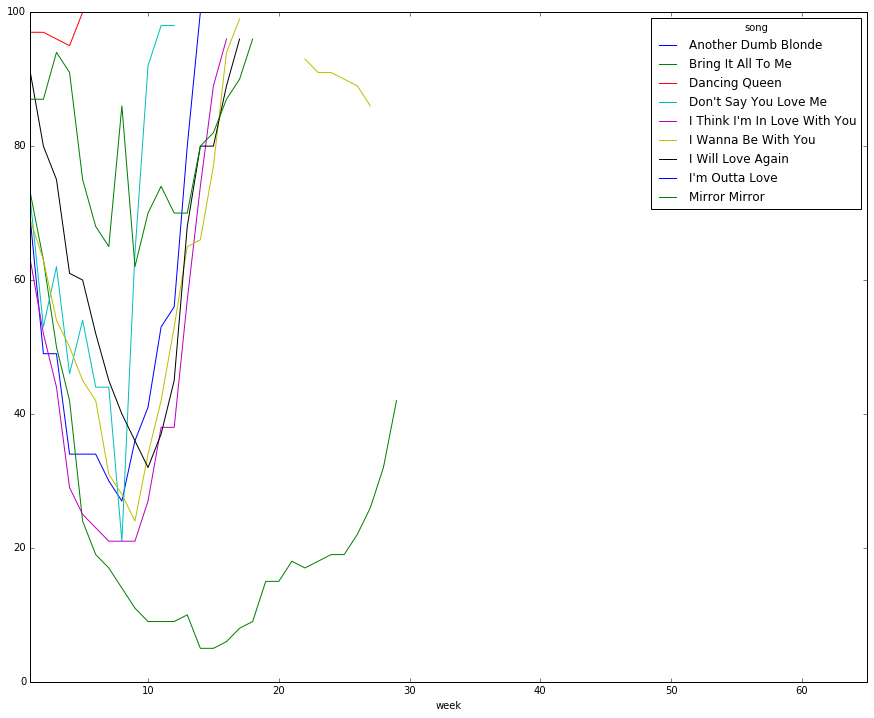

In [42]:
# How about looking at the Pop genre, looking at individual songs

slice_df = bb_df.loc[bb_df['genre'] == 'Pop']
charting_df = pd.pivot_table(slice_df, values=('rank'), columns=('song'), index=('week'))

plot = charting_df.plot()

fig = plot.get_figure()
fig.set_size_inches(15,12)
plot

That explains the double peak. One "big" song that lasted a long time with a peak in week 15, while most others in the genre peak much sooner. This makes it hard to understand from the average plot exactly what was going on.

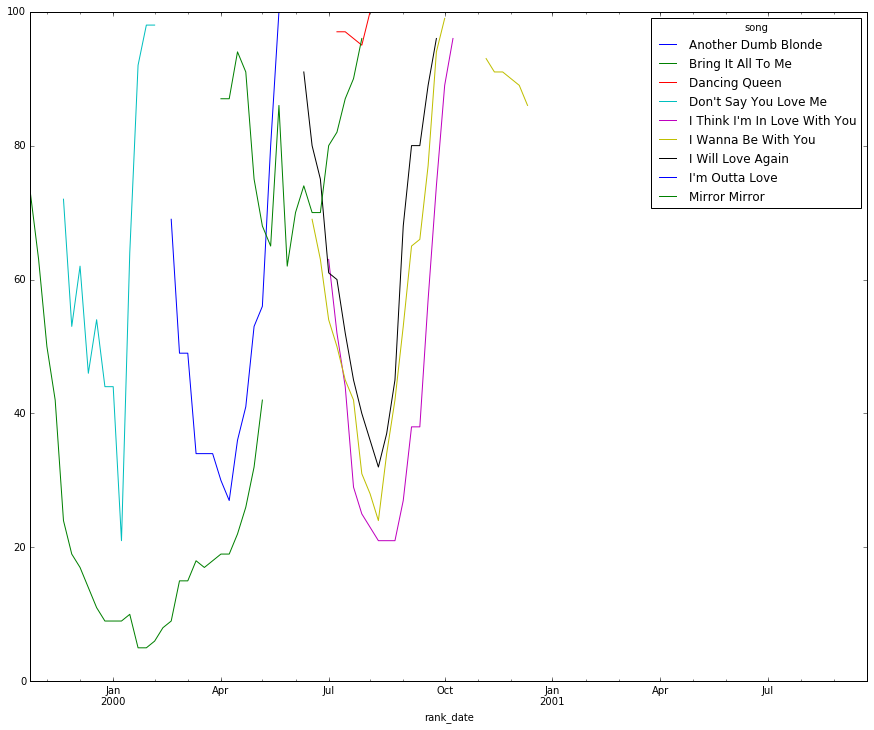

In [43]:
# I'm going to look at pop again, but this time I'll look at the real dates, not the number
# of weeks since entering the charts

slice_df = bb_df.loc[bb_df['genre'] == 'Pop']
charting_df = pd.pivot_table(slice_df, values=('rank'), columns=('song'), index=('rank_date'))

plot = charting_df.plot()

fig = plot.get_figure()
fig.set_size_inches(15,12)
plot

Those pop songs do spread out nicely across the year. Same is true for rock, though it's a bit of an eye chart. There were always a lot of rock songs on the chart in 2000.

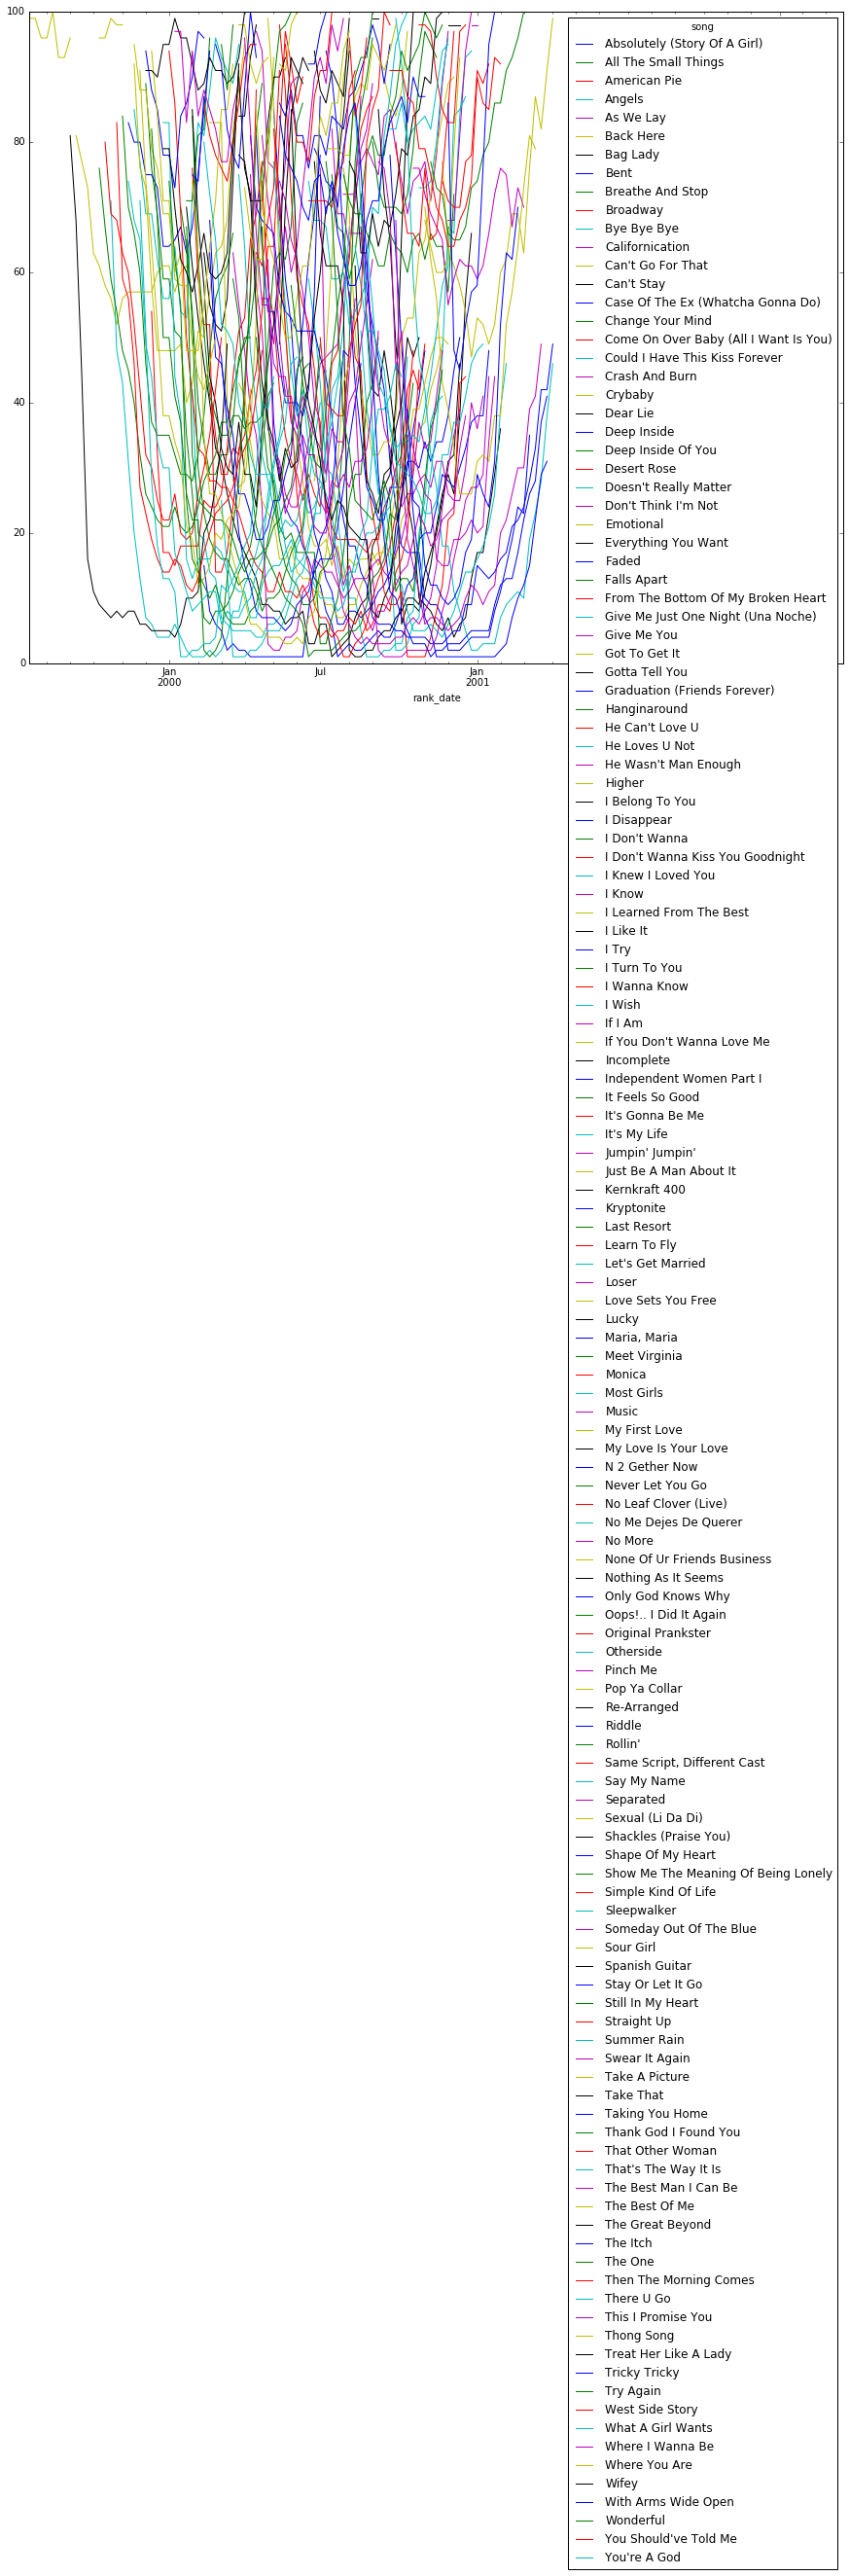

In [45]:
slice_df = bb_df.loc[bb_df['genre'] == 'Rock']
charting_df = pd.pivot_table(slice_df, values=('rank'), columns=('song'), index=('rank_date'))

plot = charting_df.plot()

fig = plot.get_figure()
fig.set_size_inches(15,12)
plot

I'm going to have a look at country, which looked a bit different from rock in aggregate.

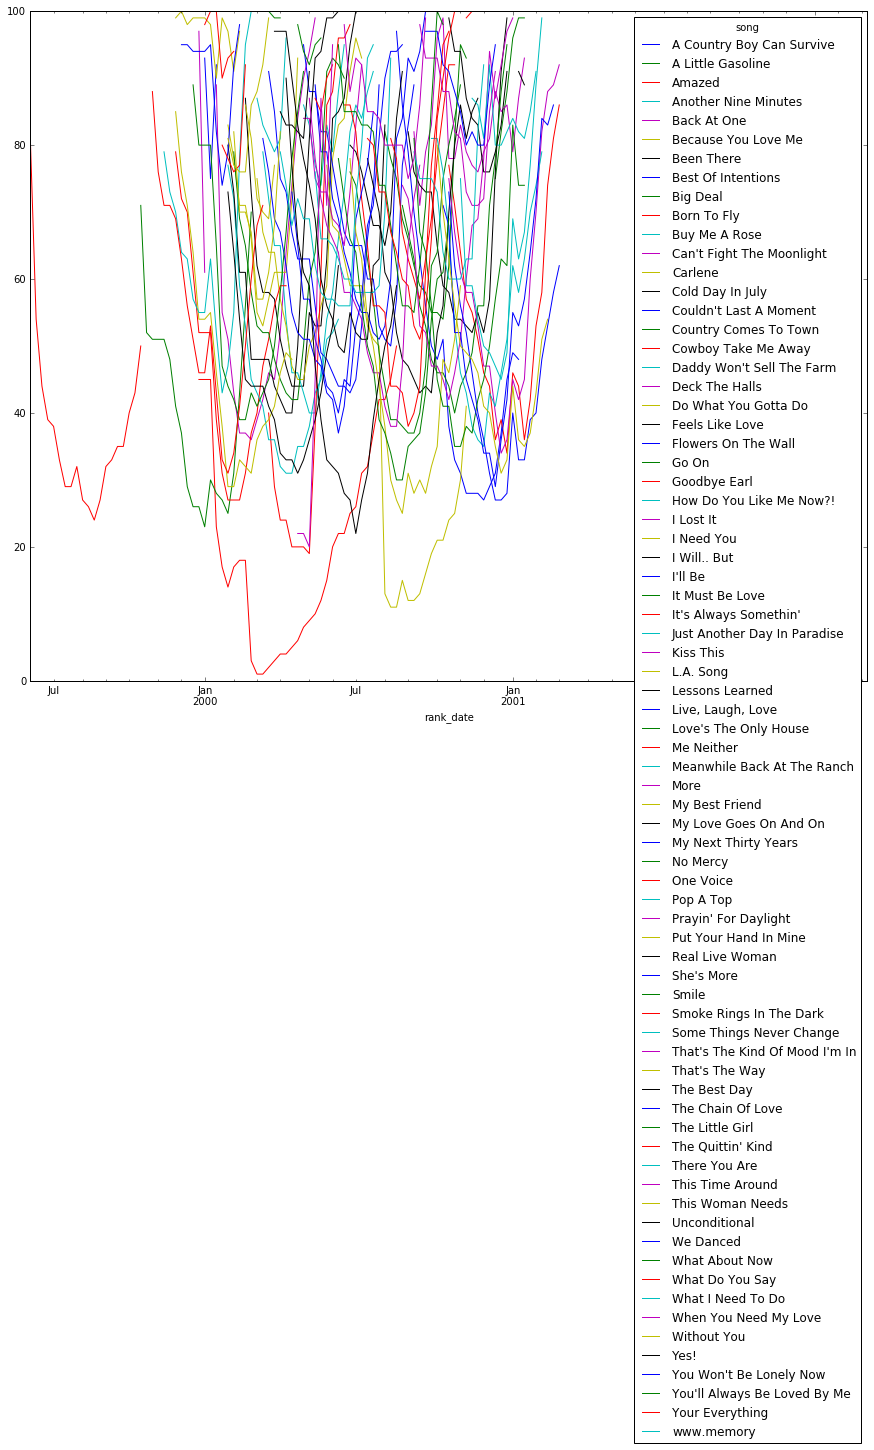

In [49]:
slice_df = bb_df.loc[bb_df['genre'] == 'Country']
charting_df = pd.pivot_table(slice_df, values=('rank'), columns=('song'), index=('rank_date'))

plot = charting_df.plot()

fig = plot.get_figure()
fig.set_size_inches(15,12)
plot

Looks like the mean results for country, at least beyond the first 20 weeks or so were dominated by a single huge hit that stayed on the chart for six months or so. This is the problem with looking at the mean the way I did. The further along you go, the fewer songs are represented in the mean performance by week.

But what about Jazz? That one looked kind of weird. It seems odd that a jazz tune would make it into the charts, but maybe there's something going on.

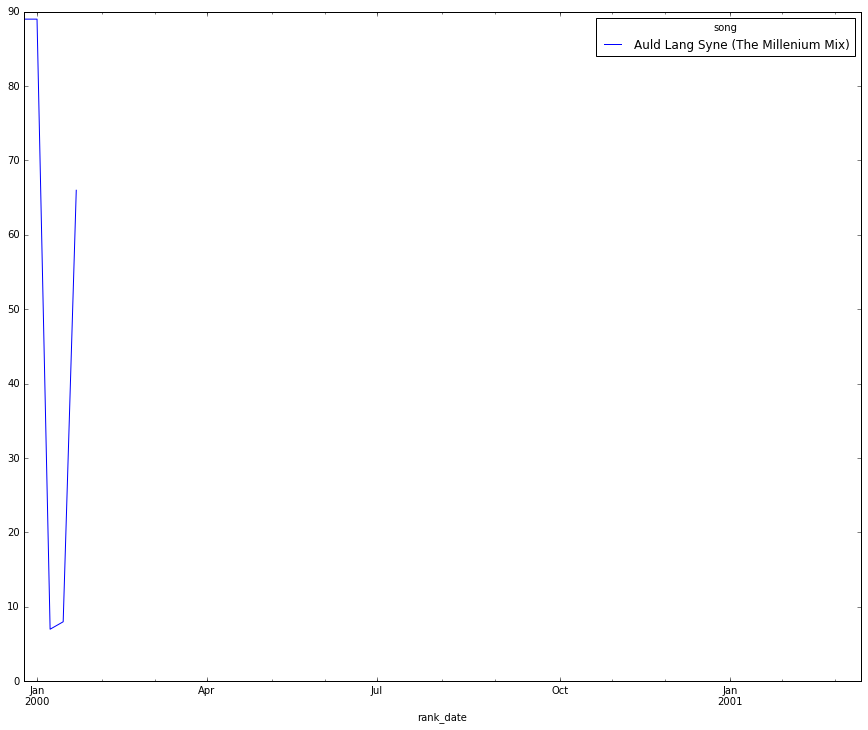

In [46]:
# Jazz had a weird profile, I'd like to look at that by song

slice_df = bb_df.loc[bb_df['genre'] == 'Jazz']
charting_df = pd.pivot_table(slice_df, values=('rank'), columns=('song'), index=('rank_date'))

plot = charting_df.plot()

fig = plot.get_figure()
fig.set_size_inches(15,12)
plot

Well, in retrospect, that makes lots of sense.

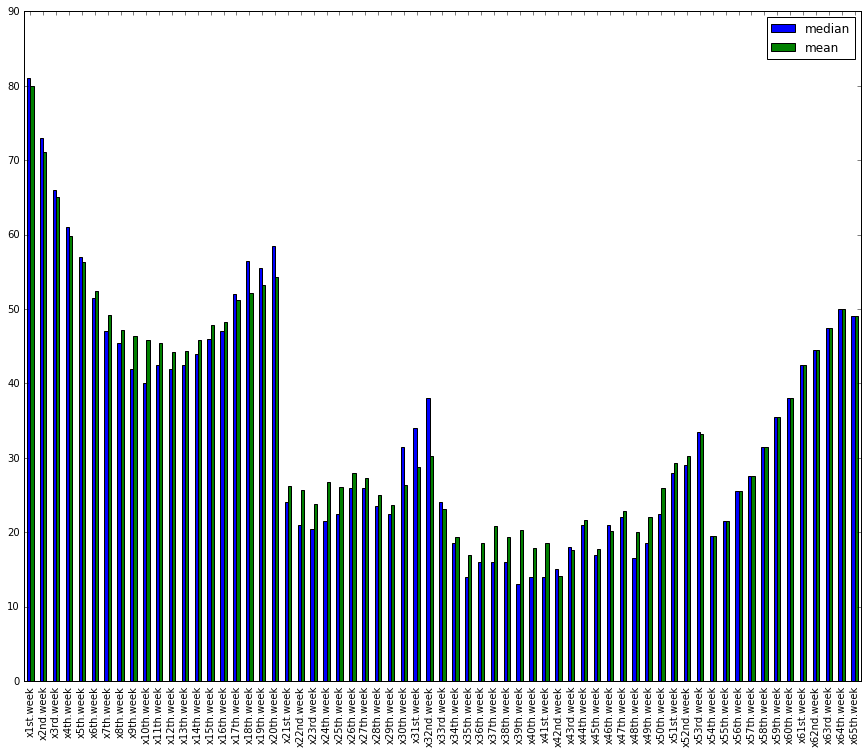

In [48]:
plot = df_temp.plot(kind = 'bar')
fig = plot.get_figure()
fig.set_size_inches(15,12)
plot


Going back to this plot again (larger now), it makes a lot more sense, given the further exploration and visualization. Some songs and genres stay in the charts relatively long times and peak around 40 weeks in. Others stay for shorter periods and peak sooner. The "scalloped" nature of the chart suggest that songs tend to peak and fall off in broad groups, some peak around 12th week and fall off around the 20th, another group peaks around the 23rd week, and the largest group peak much later. The most popular genres (Rock, Country, Rap) include almost all of the songs that stay on the charts for the long haul.

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

What factors would contribute to a song lasting longer than 20 weeks on the BB 100? Only 20% of songs do. These are likely to be the biggest and most profitable hits. ("80-20 rule")

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

* Identify a good sample of songs. It is probably desirable to seek out data from additional years to obtain a better sample.
* Collect data describing other factors about the music. Bringing in a domain expert who knows something about music (I don't) to help identify potentially influentgial factors is likely to be important here.
* Attempt to corellate the presence of each factor with the length of time these songs remain on the BB 100.
* When factors are identified, check for false positive by attempting similar correlations with songs that fell out of the BB 100 in 20 weeks or less. Use this information to narrow down to the factors that really matter.
* From the remaining list, eliminate all those factors that are not likely to be repeatable, for example an artist's death, or some world event generating particular interest in a song.
* Recommend characteristics for the most likely success.

# Step 6: Create a blog post with your code snippets and visualizations.
Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needlorward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

Class-related posts on my infrequently-updated blog are at:

http://indefinitedoubt.org/blog/category/data-science/posts-related-to-datai-science-classes/

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 